In [232]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Mini Desafío 1

1. Gráficar en el intervalo de **[-1, 1]** la función [valor absoluto](https://es.wikipedia.org/wiki/Valor_absoluto). Elegir una cantidad apropiada de puntos de acuerdo a su criterio.

 **Tip:** Usar la funcion [np.absolute](https://numpy.org/doc/stable/reference/generated/numpy.absolute.html) de numpy.

In [233]:
x = np.linspace(-1, 1, 500)
y = np.absolute(x)

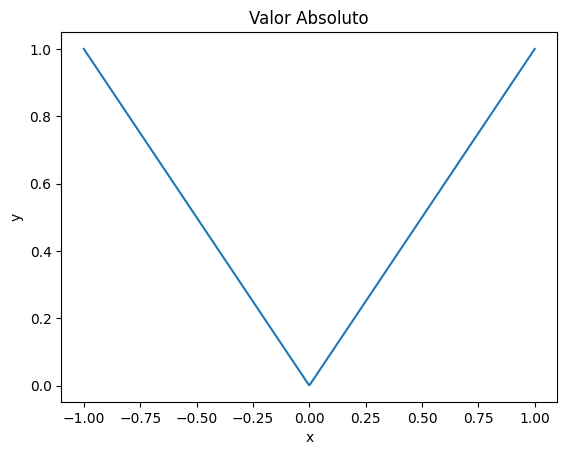

In [234]:
plt.plot(x, y)

plt.title("Valor Absoluto")
plt.xlabel("x")
plt.ylabel("y")

plt.show()

2. Gráficar en el intervalo de **[-5, 5]** una [función gaussiana](https://es.wikipedia.org/wiki/Funci%C3%B3n_gaussiana) definida como:

 $$ f(x) = e^{-x^2/2} $$

 **Tip:** Usar la funcion [np.exp](https://docs.scipy.org/doc/numpy/reference/generated/numpy.exp.html) de numpy.

In [235]:
x2 = np.linspace(-5, 5, 100)
y2 = np.exp(-np.square(x2)/2)

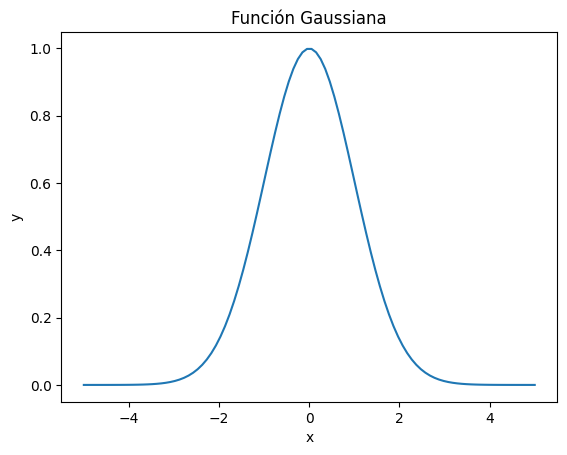

In [236]:
plt.plot(x2, y2)

plt.title("Función Gaussiana")
plt.xlabel("x")
plt.ylabel("y")

plt.show()

# Mini Desafío 2

## Mini desafío 2.A

Se pide realizar un gráfico del valor del **Bitcoin** de los últimos 10 años, marcar con un punto el valor máximo del gráfico y calcular cuándo sucedió.

 **Nota:**  
 - Usen la función [pd.read_csv](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html). Un **.csv** funciona prácticamente igual a un **.xlsx**.
 - Los valores a graficar estan la columna "Open" (usando **to_dict("list"**) podrían resolver el problema).



In [237]:
! wget  https://raw.githubusercontent.com/IEEESBITBA/Curso-Python/master/Curso_Analisis_de_Datos_Datos/BTC.csv
# WARNING No tiene 10 Años

# Datos extraidos desde https://es.finance.yahoo.com/

--2024-10-12 03:37:09--  https://raw.githubusercontent.com/IEEESBITBA/Curso-Python/master/Curso_Analisis_de_Datos_Datos/BTC.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 145140 (142K) [text/plain]
Saving to: ‘BTC.csv.1’

BTC.csv.1           100%[===================>] 141.74K  --.-KB/s    in 0.03s   

2024-10-12 03:37:09 (4.55 MB/s) - ‘BTC.csv.1’ saved [145140/145140]



In [238]:
datos_bitcoin = pd.read_csv("BTC.csv")

In [239]:
datos_bitcoin.sample(5)

,Date,Open,High,Low,Close,Adj Close,Volume
1324,2018-06-20,6770.759766,6821.560059,6611.879883,6776.549805,6776.549805,3888640000
246,2015-07-08,265.981995,272.971008,264.385986,270.785004,270.785004,36980200
1053,2017-09-22,3628.020020,3758.270020,3553.530029,3630.699951,3630.699951,1194829952
720,2016-10-24,657.161011,657.252014,652.594971,653.760986,653.760986,62218200
49,2014-12-23,332.016998,336.286987,329.601990,334.571991,334.571991,16574200


In [240]:
datos_bitcoin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1827 entries, 0 to 1826
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1827 non-null   object 
 1   Open       1827 non-null   float64
 2   High       1827 non-null   float64
 3   Low        1827 non-null   float64
 4   Close      1827 non-null   float64
 5   Adj Close  1827 non-null   float64
 6   Volume     1827 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 100.0+ KB


### Modificaciones DF

In [241]:
datos_bitcoin_copy = datos_bitcoin.copy()

In [242]:
datos_bitcoin_copy["Date"] = pd.to_datetime(datos_bitcoin_copy["Date"])

### Valor Máximo

In [243]:
valor_maximo_alcanzado = datos_bitcoin_copy["Open"].max()

In [244]:
fecha_valor_maximo = datos_bitcoin_copy[datos_bitcoin_copy["Open"] == valor_maximo_alcanzado]["Date"].iloc[0]

In [245]:
print(f"El valor máximo alcanzado fue: {valor_maximo_alcanzado} en la Fecha: {fecha_valor_maximo}")

El valor máximo alcanzado fue: 19475.800781 en la Fecha: 2017-12-17 00:00:00


### Gráfico

In [246]:
datos_bitcoin_copy["Date"].max()

Timestamp('2019-11-04 00:00:00')

Con este Dataframe solo se puede llegar hasta datos del 2019, por lo tanto no se puede graficar los valores de los últimos 10 años.

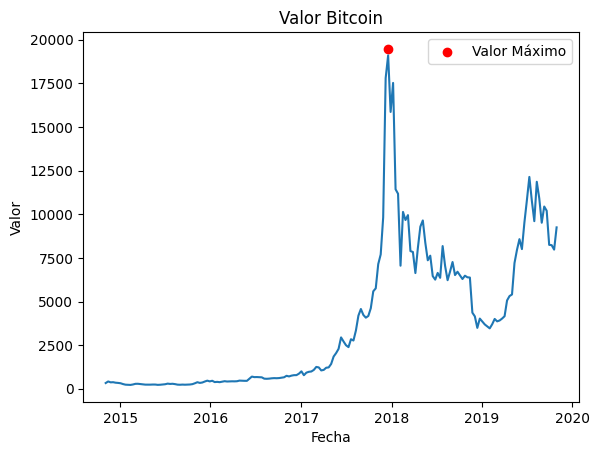

In [247]:
# Marcar el punto máximo en el gráfico
plt.scatter(fecha_valor_maximo, valor_maximo_alcanzado, color='red', label='Valor Máximo')

step = 10
plt.plot(datos_bitcoin_copy["Date"][::step], datos_bitcoin_copy["Open"][::step])

plt.title("Valor Bitcoin")
plt.xlabel("Fecha")
plt.ylabel("Valor")

plt.legend()
plt.show()

## Mini desafío 2.B - Challenge
Se pide realizar un gráfico de la cotización de las acciones diarias de las compañias **Amazon** y **Google** de los últimos 10 años. Encontrar los puntos donde se cruzan los dos gráficos y marcarlos con un punto. Usar dos tipos de línea distintos.

**Nota:**  
 - Usen la función [read_csv](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html). Recuerden que un **.csv** es prácticamente identico a un **.xlsx**.
 - Los valores a graficar estan la columna *Open* (usando **to_dict("list"**) podrían resolver el problema).

**Tip:** Ya que los gráficos son discretos, para detectar un cruce deberán revisar que la acción que es la más cara hoy sea la que era más barata ayer. Esto es porque sería muy raro que haya un día en el cual ambas acciones tengan *exactamente* el mismo precio. Para interpretar mejor este comentario pueden observar que en la siguiente imagen se producen 2 cruces, pero sólamente en el primero el cruce es *exactamente* sobre el mismo valor:

<img src="https://raw.githubusercontent.com/IEEESBITBA/Curso-Python/master/_assets/CruceDiscreto.png" width = 450>

In [248]:
! wget https://raw.githubusercontent.com/IEEESBITBA/Curso-Python/master/Curso_Analisis_de_Datos_Datos/GOOGLE.csv
! wget https://raw.githubusercontent.com/IEEESBITBA/Curso-Python/master/Curso_Analisis_de_Datos_Datos/AMZN.csv

# Datos extraidos desde https://es.finance.yahoo.com/

--2024-10-12 03:37:10--  https://raw.githubusercontent.com/IEEESBITBA/Curso-Python/master/Curso_Analisis_de_Datos_Datos/GOOGLE.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 188655 (184K) [text/plain]
Saving to: ‘GOOGLE.csv.2’

GOOGLE.csv.2        100%[===================>] 184.23K  --.-KB/s    in 0.03s   

2024-10-12 03:37:10 (5.40 MB/s) - ‘GOOGLE.csv.2’ saved [188655/188655]

--2024-10-12 03:37:10--  https://raw.githubusercontent.com/IEEESBITBA/Curso-Python/master/Curso_Analisis_de_Datos_Datos/AMZN.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting 

### Google

In [249]:
acciones_google = pd.read_csv("GOOGLE.csv")

In [250]:
acciones_google.sample(3)

,Date,Open,High,Low,Close,Adj Close,Volume
2117,2018-04-05,1041.329956,1042.790039,1020.130981,1027.810059,1027.810059,1363000
903,2013-06-10,439.403015,443.836395,438.401764,443.447845,443.447845,4693000
1958,2017-08-16,925.289978,932.700012,923.445007,926.960022,926.960022,1006700


In [251]:
acciones_google.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2516 entries, 0 to 2515
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2516 non-null   object 
 1   Open       2516 non-null   float64
 2   High       2516 non-null   float64
 3   Low        2516 non-null   float64
 4   Close      2516 non-null   float64
 5   Adj Close  2516 non-null   float64
 6   Volume     2516 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 137.7+ KB


### Copia DF Google

In [252]:
acciones_google_copy = acciones_google.copy()

In [253]:
acciones_google_copy['Date'] = pd.to_datetime(acciones_google_copy['Date'])

In [254]:
acciones_google_copy.set_index('Date', inplace=True)

In [255]:
acciones_google_copy.sample(3)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-10-18,991.770020,996.719971,986.974976,992.809998,992.809998,1057600
2016-03-29,734.590027,747.250000,728.760010,744.770020,744.770020,1903800
2011-05-04,266.585785,268.493622,265.514771,266.894623,266.894623,4249800


### Amazon

In [256]:
acciones_amazon = pd.read_csv("AMZN.csv")

In [257]:
acciones_amazon.sample(3)

,Date,Open,High,Low,Close,Adj Close,Volume
1248,2014-10-21,309.899994,315.640015,307.070007,315.329987,315.329987,3559300
2122,2018-04-12,1439.500000,1452.119995,1435.060059,1448.500000,1448.500000,3135000
2344,2019-03-01,1655.130005,1674.260010,1651.000000,1671.729980,1671.729980,4974900


In [258]:
acciones_amazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2516 entries, 0 to 2515
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2516 non-null   object 
 1   Open       2516 non-null   float64
 2   High       2516 non-null   float64
 3   Low        2516 non-null   float64
 4   Close      2516 non-null   float64
 5   Adj Close  2516 non-null   float64
 6   Volume     2516 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 137.7+ KB


### Copia DF Amazon

In [259]:
acciones_amazon_copy = acciones_amazon.copy()

In [260]:
acciones_amazon_copy['Date'] = pd.to_datetime(acciones_amazon_copy['Date'])

In [261]:
acciones_amazon_copy.set_index('Date', inplace=True)

In [262]:
acciones_amazon_copy.sample(3)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-30,193.679993,195.0,190.130005,192.149994,192.149994,5424100
2016-06-22,716.580017,717.0,707.570007,710.599976,710.599976,2260500
2015-06-29,434.980011,437.0,429.000000,429.859985,429.859985,2753200


### Gráfico

In [263]:
fechas_comunes = acciones_google_copy.index.intersection(acciones_amazon_copy.index)

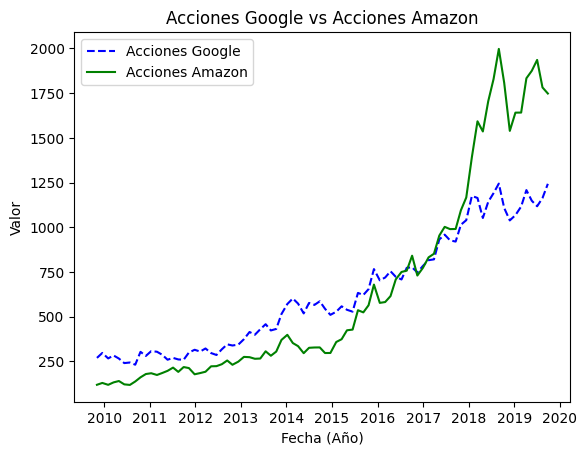

In [264]:
step = 30

plt.plot(fechas_comunes[::step], acciones_google_copy["Open"][::step], "b--", label="Acciones Google")
plt.plot(fechas_comunes[::step], acciones_amazon_copy["Open"][::step], "g", label="Acciones Amazon")

plt.title("Acciones Google vs Acciones Amazon")
plt.xlabel("Fecha (Año)")
plt.ylabel("Valor")

plt.legend()
plt.show()

# Mini desafío 3

Leer el archivo **notas.xlsx** que tiene en el campo **Notas** los puntajes de alumnos en un examen (van de 0 a 10) y armar un histograma con los datos, guardarlo en un archivo **Notas.png**

In [265]:
! wget "https://raw.githubusercontent.com/IEEESBITBA/Curso-Python/master/Curso_Analisis_de_Datos_Datos/notas.xlsx"

--2024-10-12 03:37:11--  https://raw.githubusercontent.com/IEEESBITBA/Curso-Python/master/Curso_Analisis_de_Datos_Datos/notas.xlsx
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17142 (17K) [application/octet-stream]
Saving to: ‘notas.xlsx.1’

notas.xlsx.1        100%[===================>]  16.74K  --.-KB/s    in 0s      

2024-10-12 03:37:11 (35.6 MB/s) - ‘notas.xlsx.1’ saved [17142/17142]



In [266]:
notas = pd.read_excel("notas.xlsx")

In [267]:
notas.sample(3)

,Unnamed: 0,notas
736,736,6
894,894,3
159,159,6


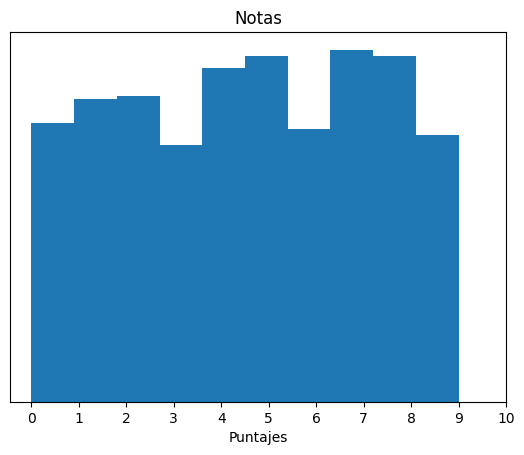

In [268]:
plt.hist(x = "notas", data = notas)

plt.title("Notas")
plt.xlabel("Puntajes")
plt.xticks(range(0, 11))
plt.yticks([])

plt.savefig("Notas.png")
plt.show()

# Ejercicios Integradores

## Análisis en las redes
Se pide graficar en función del tiempo la cantidad de vistas, minutos vistos, likes, y subscriptores ganados de un canal de Youtube. Además, se debe indicar cuándo se produjo el mayor *incremento* de un día hacia otro para cada variable mencionada.

Los datos **reales** se encuentran en un archivo *JSON* obtenido mediante la API de YouTube para el [Canal de YouTube de IEEE-ITBA](https://www.youtube.com/channel/UCpWHvOSiPtDIwIw8Tb_9g6A/featured).

Para convertir la información en el archivo a estructuras de datos conocidas se puede emplear el siguiente código, de forma que no es necesario conocer el formato *JSON*, sólamente trabajar con datos de Python:
```python
import json
json_file = open('youtube_data.json')
data = json.load(json_file)
```

**Tips:**
- Para mostrar las fechas sin que se superpongan, se puede usar `fig, ax = plt.subplots(1)` antes de comenzar a graficar, para luego usar `fig.autofmt_xdate()`. Otra alternativa es rotar el texto con `plt.xticks(rotation=90)`
- ¡Pueden buscar en internet todo lo que necesiten! Si les hace falta realizar cierta tarea que no fue explicada en esta clase pueden encontrar muchas respuestas investigando.

In [269]:
! wget "https://raw.githubusercontent.com/IEEESBITBA/Curso-Python/master/Curso_Analisis_de_Datos_Datos/youtube_data.json"

--2024-10-12 03:37:12--  https://raw.githubusercontent.com/IEEESBITBA/Curso-Python/master/Curso_Analisis_de_Datos_Datos/youtube_data.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2185 (2.1K) [text/plain]
Saving to: ‘youtube_data.json.1’

youtube_data.json.1 100%[===================>]   2.13K  --.-KB/s    in 0s      

2024-10-12 03:37:12 (30.7 MB/s) - ‘youtube_data.json.1’ saved [2185/2185]



In [270]:
import json
import pprint

In [271]:
json_file = open('youtube_data.json')
data = json.load(json_file)

In [272]:
pprint.pprint(data)

{'columnHeaders': [{'columnType': 'DIMENSION',
                    'dataType': 'STRING',
                    'name': 'day'},
                   {'columnType': 'METRIC',
                    'dataType': 'INTEGER',
                    'name': 'estimatedMinutesWatched'},
                   {'columnType': 'METRIC',
                    'dataType': 'INTEGER',
                    'name': 'views'},
                   {'columnType': 'METRIC',
                    'dataType': 'INTEGER',
                    'name': 'likes'},
                   {'columnType': 'METRIC',
                    'dataType': 'INTEGER',
                    'name': 'subscribersGained'}],
 'kind': 'youtubeAnalytics#resultTable',
 'rows': [['2020-10-01', 26, 19, 0, 0],
          ['2020-10-02', 2, 14, 0, 0],
          ['2020-10-03', 120, 78, 0, 1],
          ['2020-10-04', 3280, 1203, 75, 88],
          ['2020-10-05', 2064, 747, 22, 44],
          ['2020-10-06', 2290, 824, 28, 26],
          ['2020-10-07', 2817, 950, 13, 20],
  

In [273]:
columnas = [columna["name"] for columna in data["columnHeaders"]]

In [274]:
datos_videos = pd.DataFrame(columns=columnas, data=data["rows"])

In [275]:
datos_videos.head()

,day,estimatedMinutesWatched,views,likes,subscribersGained
0,2020-10-01,26,19,0,0
1,2020-10-02,2,14,0,0
2,2020-10-03,120,78,0,1
3,2020-10-04,3280,1203,75,88
4,2020-10-05,2064,747,22,44


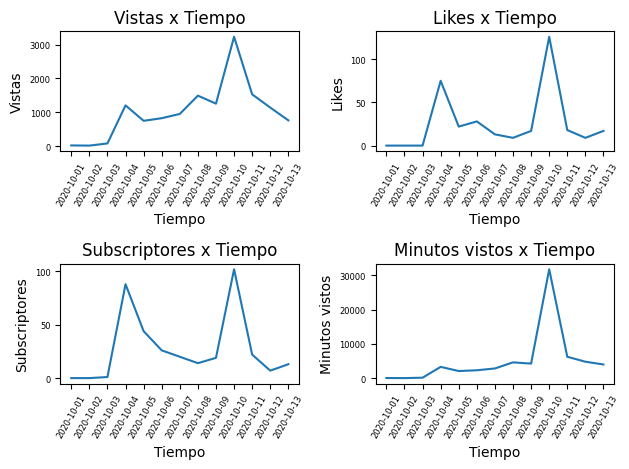

In [276]:
plt.subplot(2,2,1)

plt.plot(datos_videos["day"], datos_videos["views"])
plt.title("Vistas x Tiempo")
plt.xlabel("Tiempo")
plt.xticks(rotation=60, fontsize=6)
plt.ylabel("Vistas")
plt.yticks(fontsize=6)

plt.subplot(2,2,2)

plt.plot(datos_videos["day"], datos_videos["likes"])
plt.title("Likes x Tiempo")
plt.xlabel("Tiempo")
plt.xticks(rotation=60, fontsize=6)
plt.ylabel("Likes")
plt.yticks(fontsize=6)

plt.subplot(2,2,3)

plt.plot(datos_videos["day"], datos_videos["subscribersGained"])
plt.title("Subscriptores x Tiempo")
plt.xlabel("Tiempo")
plt.xticks(rotation=60, fontsize=6)
plt.ylabel("Subscriptores")
plt.yticks(fontsize=6)

plt.subplot(2,2,4)

plt.plot(datos_videos["day"], datos_videos["estimatedMinutesWatched"])
plt.title("Minutos vistos x Tiempo")
plt.xlabel("Tiempo")
plt.xticks(rotation=60, fontsize=6)
plt.ylabel("Minutos vistos")
plt.yticks(fontsize=6)

plt.tight_layout()
plt.show()

## Venta de pasajes
Python Airlines es la nueva low-cost en el mercado. Parece que todo el mundo quiere volar en esta aerolínea, pero la cantidad de asientos es limitada y la aerolínea no puede comprar nuevos aviones fácilmente. El departamento de ventas tuvo una gran idea (o al menos eso es lo que compañía piensa). Observaron que algunos de viajeros no se presentan para abordar el vuelo, así que van a vender más pasajes que la cantidad de asientos disponibles y confiar en que suficientes pasajeros no se presenten en el aeropuerto como para no tener que impedir el ingreso de pasajeros al avión.

Las características de los vuelos son los siguientes:

- La aerolínea tiene como ganancia neta \\$400 por pasaje vendido, independientemente de que se presente el pasajero.

- Si la cantidad de pasajeros que se presentan es mayor a la cantidad de asientos, la aerolínea debe gastar \\$600 por pasajero extra para poder ofrecer un hotel y una compensación.

- Cada pasajero tiene una probabilidad del 95% de presentarse en el aeropuerto para tomar el vuelo.

- Cada avión tiene capacidad para 222 pasajeros.

Simular 1000 vuelos en los cuales se vendieron exactamente 250 pasajes. Calcular la ganancia neta promedio que se obtiene vendiendo esta cantidad de pasajes (la venta de pasajes siempre produce la misma ganancia, y se debe restar la pérdida por compensación que depende de la cantidad de pasajeros que se presenten).

Repetir el cálculo de la ganancia promedio para distinta cantidad de pasajes vendidos, entre un rango de 222 y 250. Graficar la ganancia promedio en función de la cantidad de pasajes vendidos y mostrar el punto de máxima ganancia.


**Tip:**
- Se puede usar [np.random.rand()](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.random.rand.html#numpy.random.rand) < 0.95 para determinar si cierto pasajero se presenta o no.
- Usando `mi_lista.index( max(mi_lista) )` se obtiene primero el valor máximo de una lista, y luego se busca el índice en el cual aparece ese valor. De esta forma obtenemos el índice de la lista en el cual se encuentra el valor máximo.

In [277]:
PROBABILIDAD_ASISTENCIA_PASAJERO = 0.95
VUELOS_A_SIMULAR = 1000
PRECIO_PASAJE = 400
PRECIO_COMPENSACION = 600
CAPACIDAD_AVION = 222

In [278]:
def estimar_asientos_ocupados(pasajes_vendidos: int) -> int:
    asientos_ocupados = 0
    for pasajero in range(pasajes_vendidos):
        if np.random.rand() < PROBABILIDAD_ASISTENCIA_PASAJERO:
            asientos_ocupados += 1

    return asientos_ocupados

def estimar_balance_vuelo(precio_pasaje: int, precio_compensacion: int, capacidad_avion: int, pasajes_vendidos: int) -> int:
    ingresos = precio_pasaje * pasajes_vendidos
    balance = ingresos
    if pasajes_vendidos > capacidad_avion:
        asientos_ocupados = estimar_asientos_ocupados(pasajes_vendidos)
        exceso_asientos = max(0, (asientos_ocupados - capacidad_avion))
        balance -= precio_compensacion * (exceso_asientos)

    return balance

### Primer Caso

Analizo el caso en el que se venden exactamente 250 pasajes en todos los vuelos (1000 vuelos).

In [279]:
pasajes_vendidos = 250

In [280]:
balance_por_vuelo_pasajes_fijos = [
    estimar_balance_vuelo(PRECIO_PASAJE, PRECIO_COMPENSACION, CAPACIDAD_AVION, pasajes_vendidos)
    for vuelo in range(VUELOS_A_SIMULAR)
]

In [281]:
ganancia_neta_promedio = sum(balance_por_vuelo_pasajes_fijos) / len(balance_por_vuelo_pasajes_fijos)

In [282]:
print(f"La ganancia neta promedio de {VUELOS_A_SIMULAR} vuelo/s es: ${ganancia_neta_promedio}")

La ganancia neta promedio de 1000 vuelo/s es: $90683.8


### Segundo Caso

In [283]:
pasajes_vendidos_por_vuelo = [np.random.randint(222, 251) for _ in range(VUELOS_A_SIMULAR)]

balance_por_vuelo_pasajes_random = [
    estimar_balance_vuelo(PRECIO_PASAJE, PRECIO_COMPENSACION, CAPACIDAD_AVION, pasajes_vendidos)
    for pasajes_vendidos in pasajes_vendidos_por_vuelo
]

In [284]:
ganancia_neta_promedio = sum(balance_por_vuelo_pasajes_random) / len(balance_por_vuelo_pasajes_random)

In [285]:
print(f"La ganancia neta promedio de {VUELOS_A_SIMULAR} vuelo/s es: ${ganancia_neta_promedio}")

La ganancia neta promedio de 1000 vuelo/s es: $91585.0


In [286]:
datos = pd.DataFrame({"Pasajes vendidos": pasajes_vendidos_por_vuelo, "Balance": balance_por_vuelo_pasajes_random})

In [287]:
balance_promedio_por_pasajes_vendidos = datos.groupby("Pasajes vendidos").agg(balance_promedio=("Balance", "mean"))

#### Ganancia Maxima

In [288]:
ganancia_maxima = balance_promedio_por_pasajes_vendidos['balance_promedio'].max()

In [289]:
cantidad_pasajes_maxima_ganancia = balance_promedio_por_pasajes_vendidos[balance_promedio_por_pasajes_vendidos['balance_promedio'] == ganancia_maxima].index

#### Gráfico

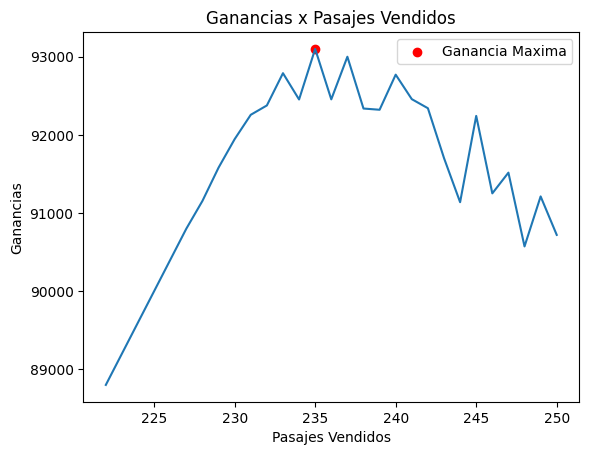

In [290]:
plt.scatter(cantidad_pasajes_maxima_ganancia, ganancia_maxima, color="red", label="Ganancia Maxima")

plt.plot(balance_promedio_por_pasajes_vendidos.index, balance_promedio_por_pasajes_vendidos['balance_promedio'])

plt.title("Ganancias x Pasajes Vendidos")
plt.xlabel("Pasajes Vendidos")
plt.ylabel("Ganancias")

plt.legend()
plt.show()

## Demografía en Argentina

Se pide visualizar la distribución etaria de la población del país. Para ello se cuenta con la información de 2019 en el archivo *PopulationArgentina2019.csv*, en el cual se detalla para cada rango de edades, el número de individuos de sexo femenino y de sexo masculino (estas fueron las únicas dos categorías que fueron contempladas por quién recolectó estos datos). La primer columna '*Age*' tiene los valores '*0-4*', '*5-9*', '*10-14*', '*15-20*', etc. hasta '*100+*' para cada rango de edades. Las siguientes dos columnas son '*M*' y '*F*', contienen el número de hombres y de mujeres en la población respectivamente. Se deben mostrar un *grafico de barras* para hombres y uno para mujeres, mostrando los rangos de edad en el eje horizontal y el **porcentaje** con respecto a la población total en el eje vertical.

**Tip:** Usar [plt.bar(x, height)](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.bar.html) para crear gráficos de barra, el resultado debería asemejarse a la siguiente imagen:

<img src="https://raw.githubusercontent.com/IEEESBITBA/Curso-Python/master/_assets/DistribucionEtariaArg.png" height=300>

Fuentes: https://www.populationpyramid.net/sources

In [291]:
! wget "https://raw.githubusercontent.com/IEEESBITBA/Curso-Python/master/Curso_Analisis_de_Datos_Datos/PopulationArgentina2019.csv"

--2024-10-12 03:37:14--  https://raw.githubusercontent.com/IEEESBITBA/Curso-Python/master/Curso_Analisis_de_Datos_Datos/PopulationArgentina2019.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 437 [text/plain]
Saving to: ‘PopulationArgentina2019.csv.2’

PopulationArgentina 100%[===================>]     437  --.-KB/s    in 0s      

2024-10-12 03:37:14 (5.58 MB/s) - ‘PopulationArgentina2019.csv.2’ saved [437/437]



In [292]:
datos_poblacion = pd.read_csv("PopulationArgentina2019.csv")

In [293]:
datos_poblacion.sample(3)

,Age,M,F
17,85-89,113868,248361
18,90-94,39710,113660
5,25-29,1764528,1738182


### Modificaciones DF

In [294]:
datos_poblacion_copy = datos_poblacion.copy()

In [295]:
poblacion_total = datos_poblacion["M"].sum() + datos_poblacion["F"].sum()

In [296]:
datos_poblacion_copy["Porcentaje M"] = (datos_poblacion_copy["M"] / poblacion_total) * 100

In [297]:
datos_poblacion_copy["Porcentaje F"] = (datos_poblacion_copy["F"] / poblacion_total) * 100

In [298]:
datos_poblacion_copy.sample(3)

,Age,M,F,Porcentaje M,Porcentaje F
1,5-9,1878514,1810689,4.194921,4.043461
0,0-4,1905961,1835921,4.256213,4.099806
3,15-19,1793158,1734206,4.004312,3.872666


### Gráfico

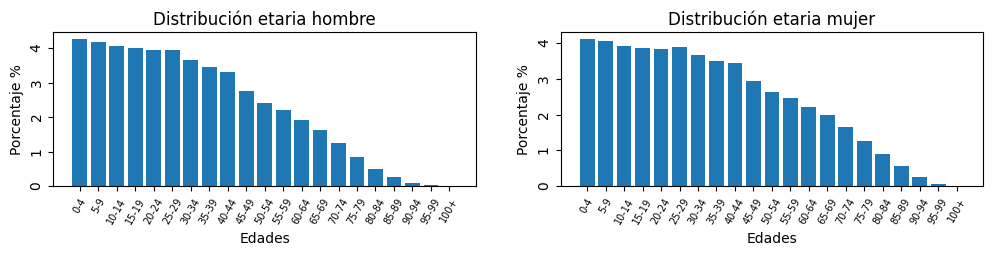

In [299]:
plt.figure(figsize=(12,2))

plt.subplot(1,2,1)

plt.bar(x=datos_poblacion_copy["Age"], height=datos_poblacion_copy["Porcentaje M"])

plt.title("Distribución etaria hombre")
plt.xlabel("Edades")
plt.xticks(rotation=60, fontsize=7)
plt.ylabel("Porcentaje %")
plt.yticks(rotation=90)

plt.subplot(1,2,2)

plt.bar(x=datos_poblacion_copy["Age"], height=datos_poblacion_copy["Porcentaje F"])

plt.title("Distribución etaria mujer")
plt.xlabel("Edades")
plt.xticks(rotation=60, fontsize=7)
plt.ylabel("Porcentaje %")
plt.yticks(rotation=90)

plt.show()

## Bug Catcher y el disco de la Eutrofia
**Atención**: *Este problema asume algunos conocimientos básicos de analisis matemático*.

Pasaron 10 años desde que se concretó un acuerdo para la construcción de una fabrica de queso al lado del Lago Nahuel Huapi, a dos kilometros de la ciudad natal de *Bug Catcher*. *Bug Catcher* dice que en ese tiempo el agua del lago ha visto un deterioro en su calidad y esta peticionando ante la ciudad la imposición de regulaciones más estrictas sobre los efluentes del sector industruial.

Pero primero tiene que demostrar este deterioro... *Y así,* Bug Catcher *ha venido a tí para pedirte ayuda, graficando los resultados de un estudio de agua.*

$\newcommand{\zf}{{z_{\mathrm{f}}}}$

---


<center>
<img src="https://static.wikia.nocookie.net/espokemon/images/c/c9/Cazabichos_RAA.png" height=150 title="I catch bugs and stop global conglomerates from getting away with enviromental crimes." ></center>


---


**El estudio**

Se efectua un estudio de <a href="https://en.wikipedia.org/wiki/Trophic_state_index#Eutrophic">turbiedad</a> de agua del tipo <a href="https://en.wikipedia.org/wiki/Secchi_disk">*Secchi*</a> . El estudio consiste en hundir un disco blanco en el cuerpo de agua a estudiar y medir la profundidad $\zf$  a la cual el disco desaparece. Para el estudio se tiene que tener en cuenta la intensidad de la luz sobre el cuerpo de agua $I_0$.



**El problema**

*Bug Catcher* quiere un gráfico que muestre la turbiedad del lago Nahuel Huapi y compararlo a la de otro lago cercano <a href="https://es.wikipedia.org/wiki/Anexo:Definiciones_usuales_en_hidrolog%C3%ADa#Aguas_arriba">*río arriba*</a>.

**Objetivo**

Graficar la intensidad de luz $I_z$ en el eje vertical a una profundidad $z$ ($z$ en el eje horizontal) para el Nahuel Huapi y el otro lago.

**Datos**

Rige la ley de <a href="https://en.wikipedia.org/wiki/Beer%E2%80%93Lambert_law">Beer-Lambert</a>:
$$\frac{I_{z}}{I_{0}}=e^{-k z}$$
donde
* $I_z$ es la intensidad de luz a una profundidad $z$
* $I_0$ es la intensidad de luz sobre la superficie del agua, para un día soleado $I_0\approx 700\  \mathrm{W/m}^2$
* $k$ es el factor de atenuación del agua. Indica turbiedad.

Sabemos que el disco <a href="https://en.wikipedia.org/wiki/Secchi_disk">*Secchi*</a>  de *Bug Catcher* desaparece bajo **56cm** de agua del Nahuel Huapi.  **Para todos los cálculos suponga que la relación** $\frac{I_\zf}{I_0}$ **vale** $10\%$ (para la profundidad a la cual desaparece el disco).

El factor de atenuación del lago *río arriba* fue medido la semana pasada y vale $k_{\mathrm{ra}}=0,009\ \mathrm{cm}^{-1}$.

**Tips:**

* Hay que despejar $k$ y calcularla para el lago Nahuel Huapi antes de graficar.
* La función `log` de la libreria `math` es el logaritmo natural.
* Prueben graficar ambas curvas hasta la profundidad $\zf$ del lago río arriba.
* **Tener una bolígrafo y un cuaderno abierto ayuda.**

In [300]:
import math

In [301]:
INTENSIDAD_SOBRE_SUPERFICIE = 700

In [302]:
def calcular_intensidad_de_la_luz(factor_atenuacion: float, profundidad: float) -> float:
    intensidad_luz = math.e**(-1*factor_atenuacion*profundidad) * INTENSIDAD_SOBRE_SUPERFICIE
    return intensidad_luz

### Nahuel Huapi: K (coeficiente de atenuación)

$\frac{I_{z}}{I_{0}}=e^{-k z}⇒0.1=e^{-k.56cm^{-1}}⇒ln(0.1)=ln(e^{-k.56cm^{-1}})⇒k=-\frac{ln(0.1)}{56cm^{-1}}$

In [303]:
K_nahu = (math.log(0.1)/56) * -1

### Cálculo de intensidad en distintas profundidades

In [304]:
profundidades = range(0, 440)

#### Nahuel Huapi

In [305]:
intensidades_nahu = [calcular_intensidad_de_la_luz(K_nahu, profundidad) for profundidad in profundidades]

#### Lago Río Arriba

In [306]:
K_ra = 0.009

In [307]:
intensidades_ra = [calcular_intensidad_de_la_luz(K_ra, profundidad) for profundidad in profundidades]

### Gráfico

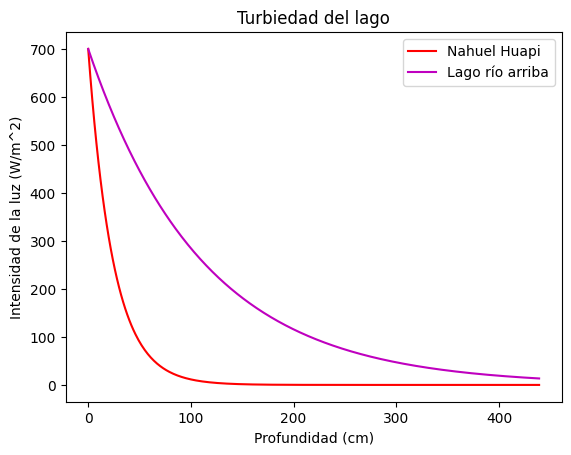

In [308]:
plt.plot(profundidades, intensidades_nahu, "r", label="Nahuel Huapi")
plt.plot(profundidades, intensidades_ra, "m", label="Lago río arriba")

plt.title("Turbiedad del lago")
plt.xlabel("Profundidad (cm)")
plt.ylabel("Intensidad de la luz (W/m^2)")

plt.legend()
plt.show()

## Las Algas del Nahuel Huapi (Bug Catcher Continuado)

*Bug Catcher* ha <a href="https://link.springer.com/article/10.1007/BF00041459">encontrado un paper</a> sobre el crecimiento de algas en relación a la intensidad de luz. No entiende los gráficos del paper (porque no estan hechos en Python) pero llega a leer:

* Debajo de una intensidad de $3\%$ de la del sol ($I_0$) el crecimiento de las algas disminuye rapidamente

* entre $3\%$ y $25\%$ las algas crecen bien.

**Objetivo**

Mostrar rango de profundidad a la cual las algas podrían sobrevivir en el Nahuel Huapi en $\color{green}{\textsf{verde}}$ y la zona a partir de la cual sufren en $\color{red}{\textsf{rojo}}$.

**Tips:**
* $\% I_0=\frac{I_{z}}{I_{0}}=e^{-k z}\quad \longrightarrow \quad z = -\frac{\ln(\% I_0)}{k}$  
* Funcion coloreado debajo la curva: `plt.fill_between(zbien, Izbien, color="green", label="Crecimiento bueno")`

**Bonus**

¿Cómo se ve afectada la zona donde sobreviven las algas al modificar el parametro $k$?

#### Cálculo porcentaje de intensidades de luz

Utilizo la constante INTENSIDAD_SOBRE_SUPERFICIE del ejercicio anterior.

In [309]:
porcentajes_intensidades_nahu = [(intensidad / INTENSIDAD_SOBRE_SUPERFICIE) * 100 for intensidad in intensidades_nahu]

#### Cálculo profundidades críticas

Utilizo la K_nahu del ejercicio anterior.

In [310]:
z_3 = -math.log(0.03) / K_nahu
z_25 = -math.log(0.25) / K_nahu

#### Gráfico

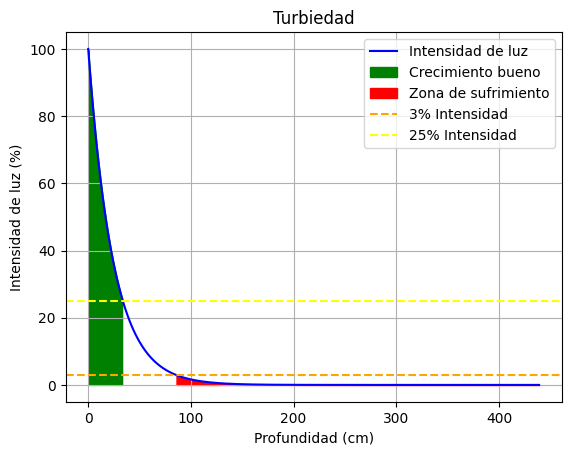

In [311]:
plt.plot(profundidades, porcentajes_intensidades_nahu, color="blue", label="Intensidad de luz")

plt.fill_between(profundidades, porcentajes_intensidades_nahu, where=[p <= z_25 for p in profundidades], color="green", label="Crecimiento bueno")

plt.fill_between(profundidades, porcentajes_intensidades_nahu, where=[p >= z_3 for p in profundidades], color="red", label="Zona de sufrimiento")

plt.title("Turbiedad")
plt.xlabel("Profundidad (cm)")
plt.ylabel("Intensidad de luz (%)")
plt.grid(True)

plt.axhline(3, color='orange', linestyle='--', label="3% Intensidad")
plt.axhline(25, color='yellow', linestyle='--', label="25% Intensidad")

plt.legend()
plt.show()

## Esos Malditos Mecánicos...
**Intro**

Volodymyr es un profesor de la materia **Elementos Finitos I** en el ITBA. El <a href="https://en.wikipedia.org/wiki/Finite_element_method">método de los elementos finitos</a> consiste en modelar sistemas de sólidos o fluidos mediante una partición del sistema en subsistemas que se resuelven en conjunto según condiciones de borde y condiciones iniciales.

**Problema**

El segundo cuatrimestre del 2018 Volodymyr tomó 3 parciales y ahora quiere obtener estadísticas y además saber cuales alumnos aprobaron y cuales no. El archivo `NotasFinitos.csv` contiene los datos **reales** de dicha materia sin los nombres de los alumnos.



---
<center>
<img src="https://grupocarman.com/blog/wp-content/uploads/2014/10/Mallado-por-elementos-finitos.png" title="Un modelo de un motor. En rojo las partes más comprometidas por fuerzas." height=200>
  
  ***La resolución correcta de este ejercicio indica que el programador tiene un sólido conocimiento del manejo de datos y estructuras de control.***
</center>

---


**Objetivos**

Del archivo `"https://raw.githubusercontent.com/IEEESBITBA/Curso-Python/master/Curso_Analisis_de_Datos_Datos/NotasFinitos.csv"` :

* Obtener promedios para cada parcial.
* Obtener promedio para toda la cursada.
* Obtener promedios de los que aprobaron la materia, para cada parcial.


***Condiciones de Borde***

* Condición de aprobación de parcial:   `Nota>=60`.

* Para aprobar la materia se necesita aprobar 2 parciales y sumar entre los tres parciales: `sumaNotas>=160`.

* Las notas pueden contener los siguientes valores:
  * `0-140` : Nota numérica.
  * `'Ausente'` : Indica ausencia al parcial.
  * `'NaN'` : El alumno no cumplio condiciones para rendir parcial (celda vacia).

* Tomar los valores `Ausente` y `NaN` como `0`. Usar la función $\mathrm{isNaN}$ en el código de arriba.

**Tips:**
* ¡Las funciones pueden ser muy útiles para este ejercicio!

* Existe una columna de tres números llamada `MAX` con el máximo puntaje por parcial (ordenado de primer parcial a tercer parcial). No hace falta usar este dato para resolver el ejercicio.

* Convertir la nota de `string` a `int` usando la función $\mathrm{int}(Nota)$.


***Hint:***

Hay `49` alumnos, `19` aprobaron la materia según el criterio dado.


In [312]:
! wget "https://raw.githubusercontent.com/IEEESBITBA/Curso-Python/master/Curso_Analisis_de_Datos_Datos/NotasFinitos.csv"

--2024-10-12 03:37:16--  https://raw.githubusercontent.com/IEEESBITBA/Curso-Python/master/Curso_Analisis_de_Datos_Datos/NotasFinitos.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 547 [text/plain]
Saving to: ‘NotasFinitos.csv.1’

NotasFinitos.csv.1  100%[===================>]     547  --.-KB/s    in 0s      

2024-10-12 03:37:16 (23.3 MB/s) - ‘NotasFinitos.csv.1’ saved [547/547]



In [313]:
notas_finitos = pd.read_csv("NotasFinitos.csv")

In [314]:
notas_finitos.sample(3)

,1P,2P,3P,MAX
1,5,Ausente,NaN,140.0
6,73,110,85,NaN
28,50,Ausente,NaN,NaN


In [315]:
notas_finitos_copy = notas_finitos.copy()

#### Modificaciones DF

Como la columna MAX no es relevante para el ejercicio, la descarto.

In [316]:
notas_finitos_copy.drop(columns=["MAX"], inplace=True)

Reemplazo los NaN y Ausentes por 0 (Por enunciado)

In [317]:
notas_finitos_copy.fillna(0, inplace=True)

In [318]:
notas_finitos_copy.replace("Ausente", 0, inplace=True)

Convierto todas las notas a tipo numérico.

In [319]:
notas_finitos_copy = notas_finitos_copy.apply(pd.to_numeric)

#### Promedios por parcial

In [320]:
promedio_parcial_1 = notas_finitos_copy["1P"].mean()

In [321]:
print("Promedio Parcial 1:", promedio_parcial_1)

Promedio Parcial 1: 46.795918367346935


In [322]:
promedio_parcial_2 = notas_finitos_copy["2P"].mean()

In [323]:
print("Promedio Parcial 2:", promedio_parcial_2)

Promedio Parcial 2: 45.816326530612244


In [324]:
promedio_parcial_3 = notas_finitos_copy["3P"].mean()

In [325]:
print("Promedio Parcial 3:", promedio_parcial_3)

Promedio Parcial 3: 44.183673469387756


#### Promedio Cursada

In [326]:
promedio_cursada = (notas_finitos_copy["1P"].sum() + notas_finitos_copy["2P"].sum() + notas_finitos_copy["3P"].sum()) / (len(notas_finitos_copy) * 3)

In [327]:
print("Promedio cursada:", promedio_cursada)

Promedio cursada: 45.59863945578231


#### Aprobados

In [328]:
def aprobo_cursada(notas) -> bool:
    exámenes_aprobados = sum(1 for nota in notas if nota >= 60)
    return exámenes_aprobados >= 2 and sum(notas) >= 160

In [329]:
alumnos_aprobados = notas_finitos_copy[notas_finitos_copy.apply(aprobo_cursada, axis=1)]

##### Promedios por parcial

In [330]:
promedio_aprobados_parcial_1 = alumnos_aprobados["1P"].mean()

In [331]:
print("Promedio Parcial 1:", promedio_aprobados_parcial_1)

Promedio Parcial 1: 59.89473684210526


In [332]:
promedio_aprobados_parcial_2 = alumnos_aprobados["2P"].mean()

In [333]:
print("Promedio Parcial 2:", promedio_aprobados_parcial_2)

Promedio Parcial 2: 85.26315789473684


In [334]:
promedio_aprobados_parcial_3 = alumnos_aprobados["3P"].mean()

In [335]:
print("Promedio Parcial 3:", promedio_aprobados_parcial_3)

Promedio Parcial 3: 64.47368421052632
